In [27]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

In [28]:
# arrange 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width)
def tiles(examples):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]
    
    space_between_tiles = 2
    
    height = rows_count * (tile_height + space_between_tiles)
    width = cols_count * (tile_width + space_between_tiles)
    
    img_matrix = np.empty(shape=(height, width))
    img_matrix.fill(np.nan)
    
    for row in range(rows_count):
        for col in range(cols_count):
            row_ind = (tile_height + space_between_tiles) * row
            col_ind = (tile_width + space_between_tiles) * col
            img_matrix[row_ind:row_ind + tile_height, col_ind:col_ind + tile_width] = examples[row, col]
    
    return img_matrix

## MNIST Dataset

In [3]:
from six.moves import urllib    
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [4]:
pip install python-mnist


Looking in indexes: https://pip-is-disabled.jupyter.lab.ii.agh.edu.pl/
ERROR: Could not find a version that satisfies the requirement python-mnist (from versions: none)
ERROR: No matching distribution found for python-mnist
Note: you may need to restart the kernel to use updated packages.


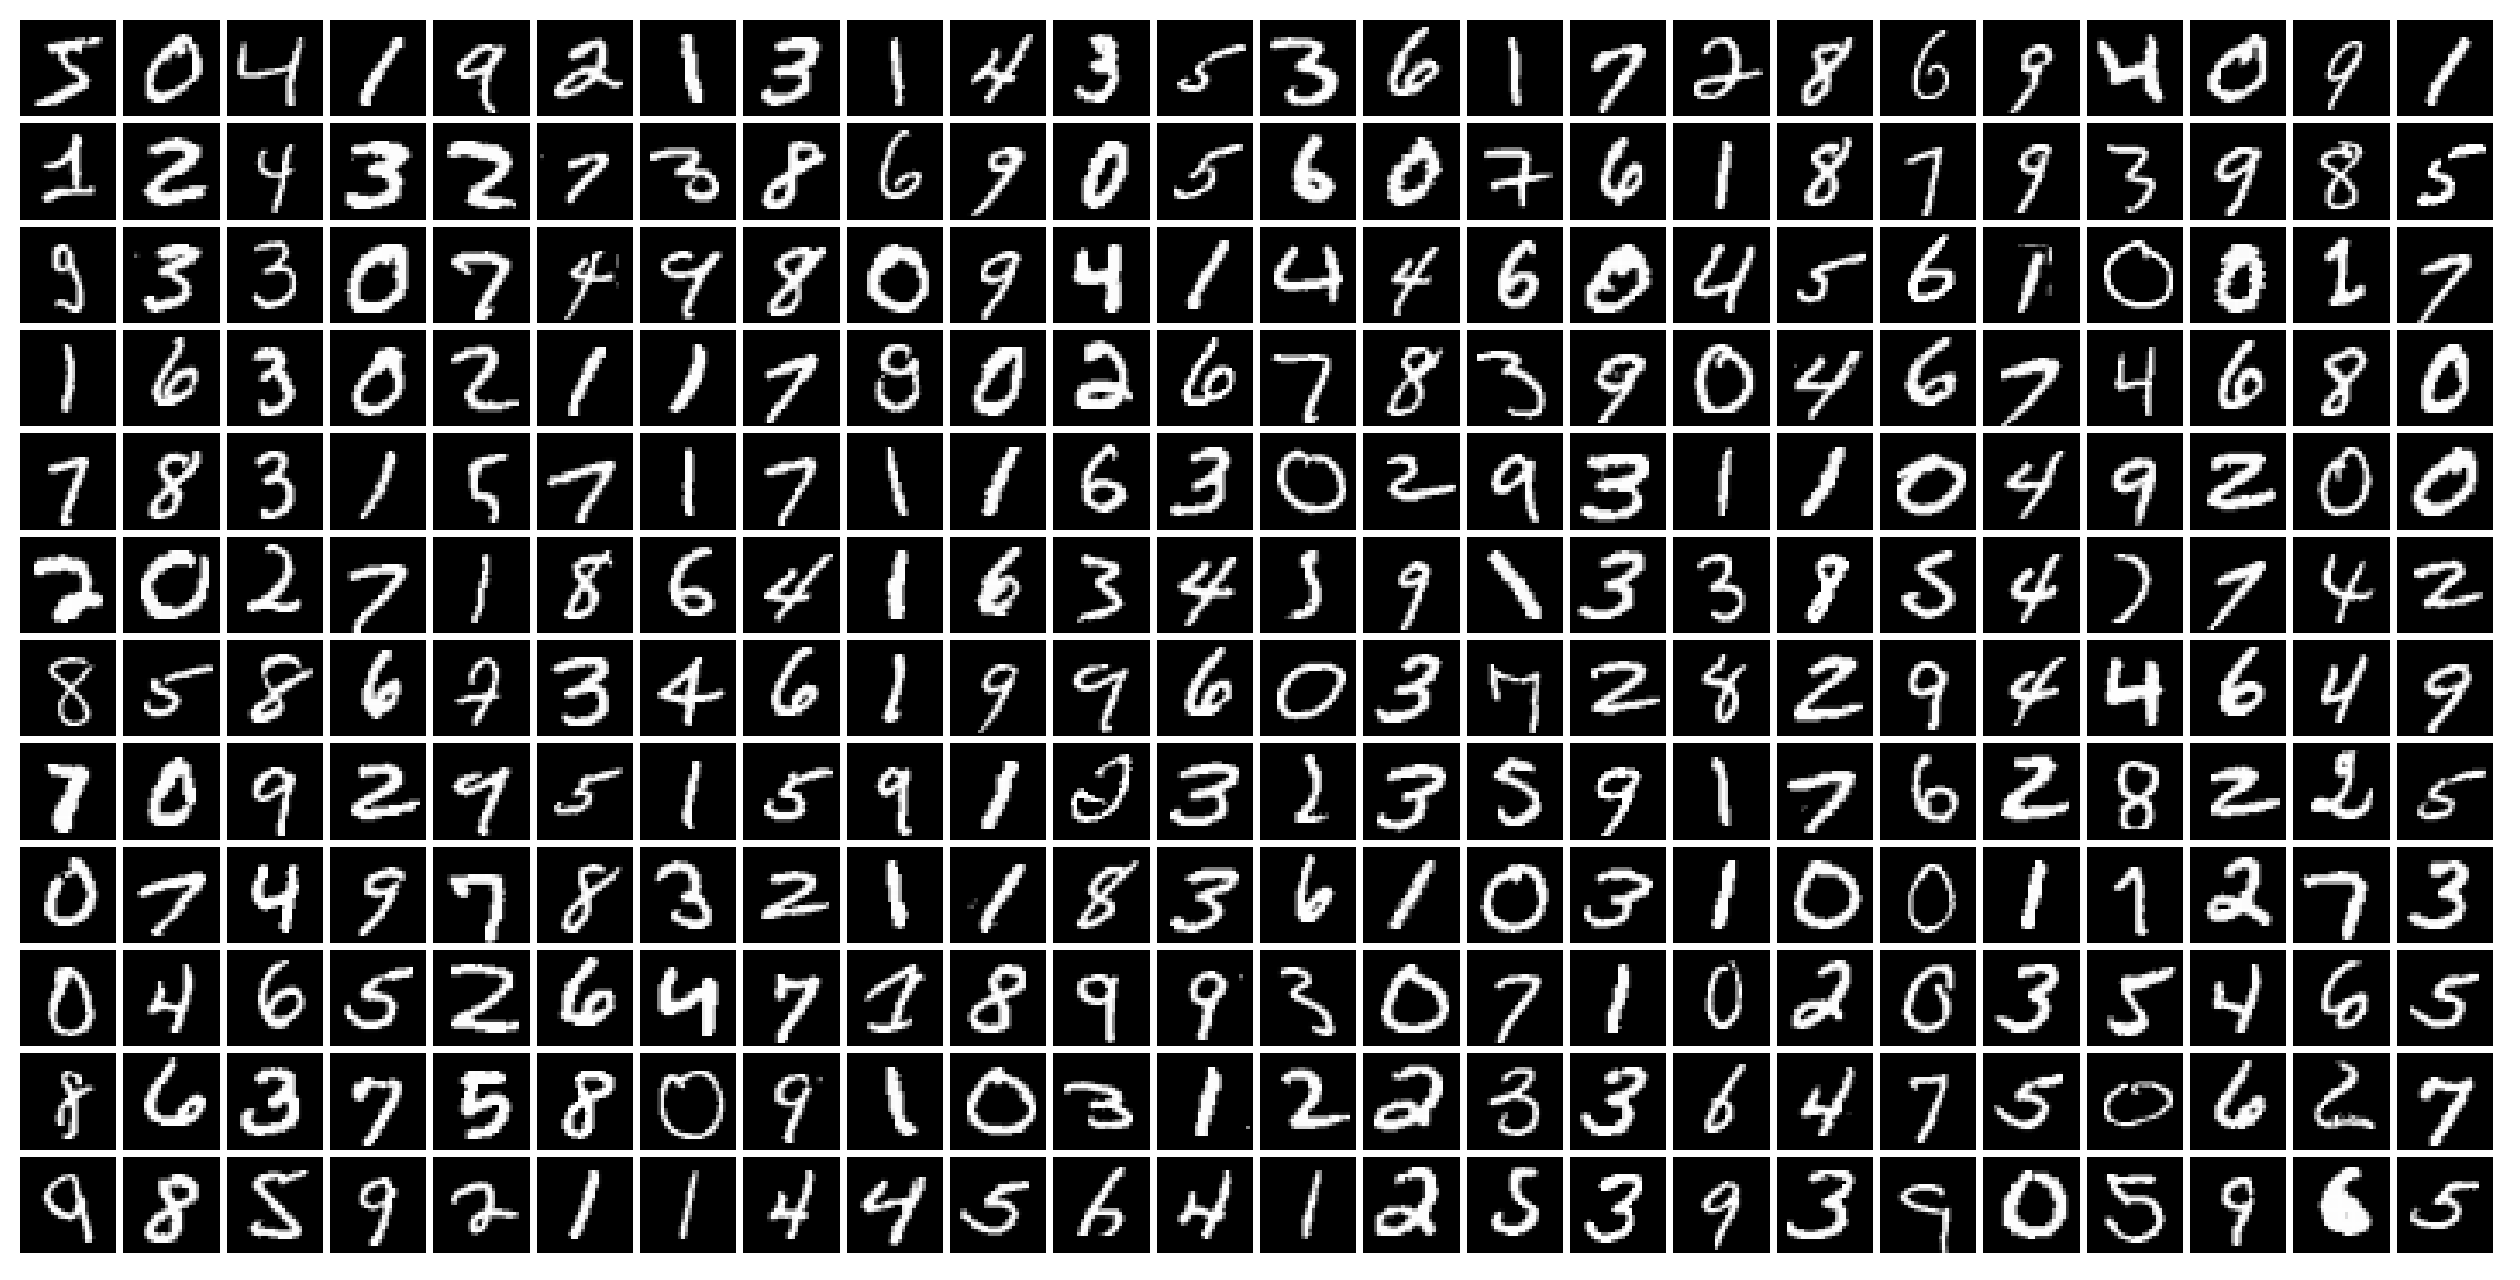

In [5]:
import mnist
digits = np.reshape(mnist.train_images()[:12*24], newshape=(12, 24, 28, 28))
img = tiles(digits)

plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

In [6]:
X = mnist.train_images().astype(np.float32) / 255.0
y = mnist.train_labels()
X.shape

(60000, 28, 28)

Reshape `X` so that the last two dimensions are collapsed into single dimension.

In [7]:
X = X.reshape(X.shape[0], -1)

In [8]:
X.shape

(60000, 784)

## Visualizing the distribution of MNIST digits

Add a scatter plot to `plot`, which:
* displays the first two dimensions of `X`,
* includes only these elements from `X` for which `y == i` (i.e. elements from the i-th class),
* includes label (i.e. `i`) in the legend.


In [9]:
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        plot.scatter(dim0, dim1, label=f"Digit {i}")
    
    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

### Principal Component Analysis (PCA)

In [10]:
SAMPLES_LIMIT = 2000
X_small = X[:SAMPLES_LIMIT]
y_small = y[:SAMPLES_LIMIT]

Use PCA function to embed `X_small` in two dimensions. Store the result in `X_pca_embedded`.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_embedded = pca.fit_transform(X_small)

In [12]:
X_pca_embedded.shape

(2000, 2)

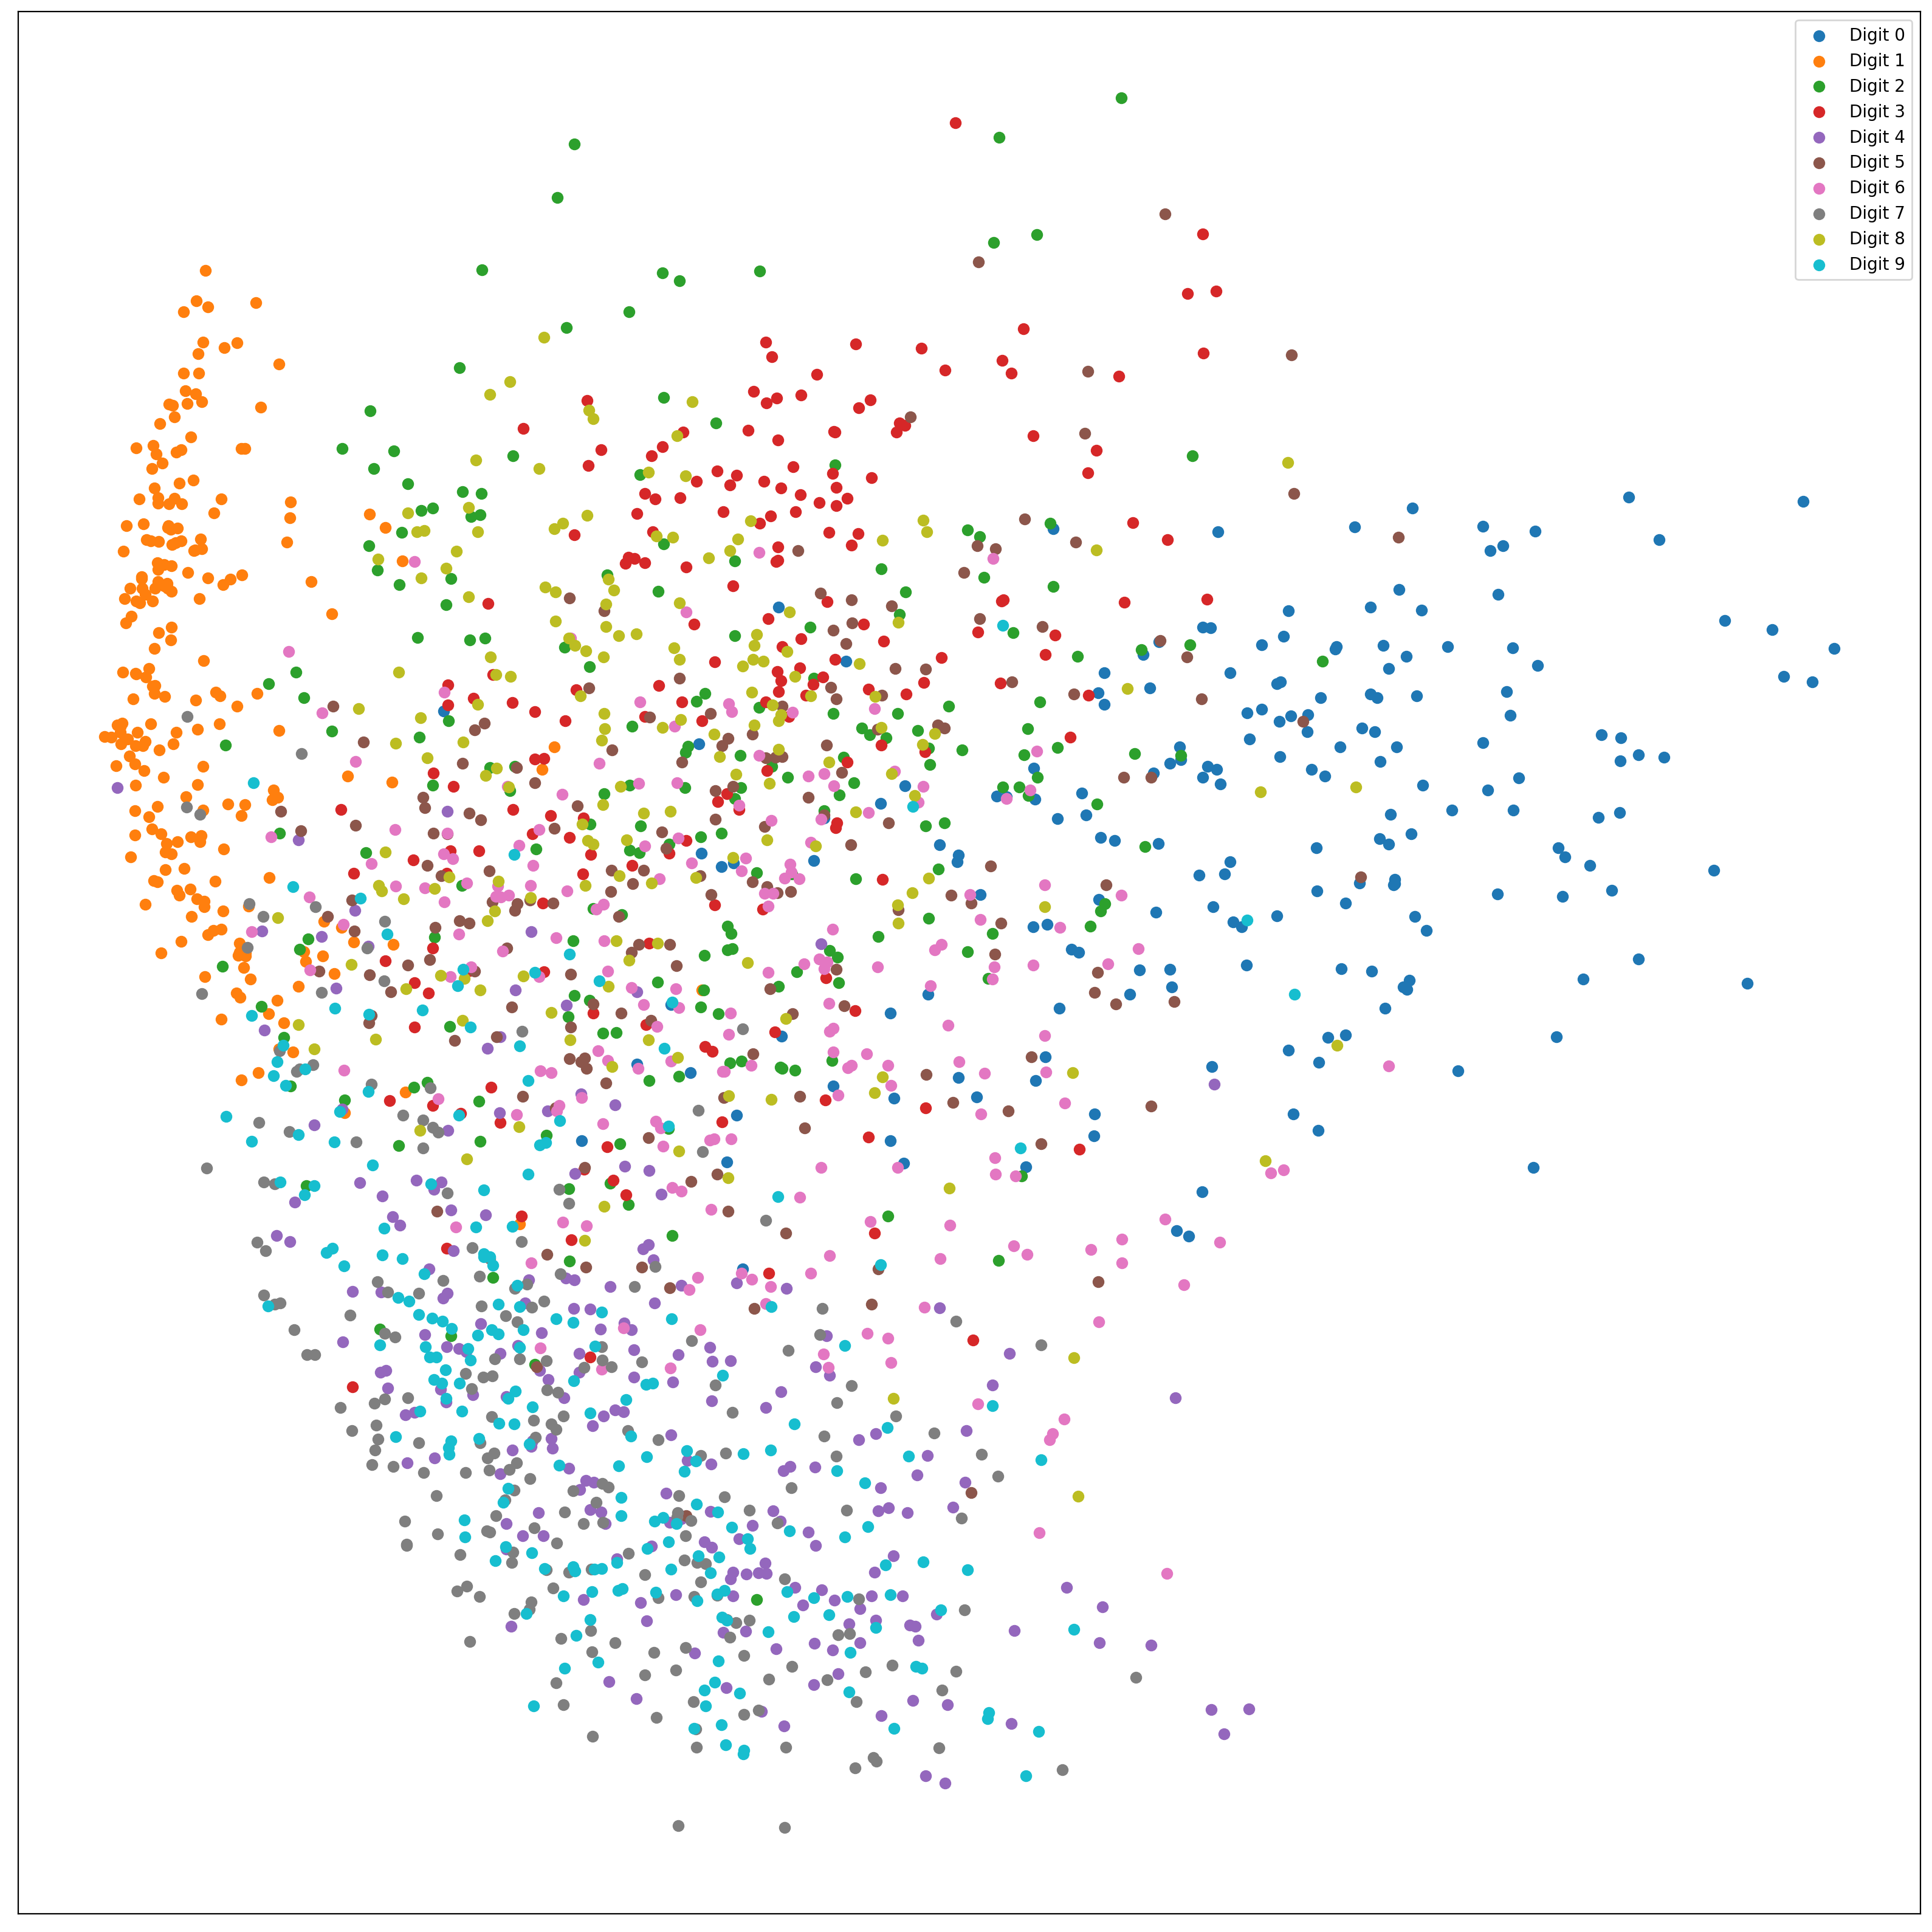

In [13]:
plot_2d_mnist_scatter(X_pca_embedded, y_small)

### T-distributed Stochastic Neighbour Embedding (T-SNE)

Make sure to have a look on this increadible [article on T-SNE](https://distill.pub/2016/misread-tsne/).

Use `T-SNE` function to embed `X_small` in two dimensions. Store the result in `X_tsne_embedded`. <BR>
Use:
 * `n_iter=500` argument to limit the number of T-SNE iterations, 
 * `verbose=2` argument to see a verbose output during embedding.

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=500, verbose=2)
X_tsne_embedded = tsne.fit_transform(X_small)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 1.721s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.528207
[t-SNE] Computed conditional probabilities in 0.175s
[t-SNE] Iteration 50: error = 77.8440094, gradient norm = 0.0137036 (50 iterations in 6.796s)
[t-SNE] Iteration 100: error = 75.6770096, gradient norm = 0.0003718 (50 iterations in 8.400s)
[t-SNE] Iteration 150: error = 75.6486359, gradient norm = 0.0007063 (50 iterations in 8.502s)
[t-SNE] Iteration 200: error = 75.5874481, gradient norm = 0.0006339 (50 iterations in 7.098s)
[t-SNE] Iteration 250: error = 75.5466003, gradient norm = 0.0003109 (50 iterations in 8.506s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.546600
[t-SNE] Iteration 300: error = 1.7905595, gradient norm = 0.0210365 (50 iterations in 6.101s)

In [15]:
X_tsne_embedded.shape

(2000, 2)

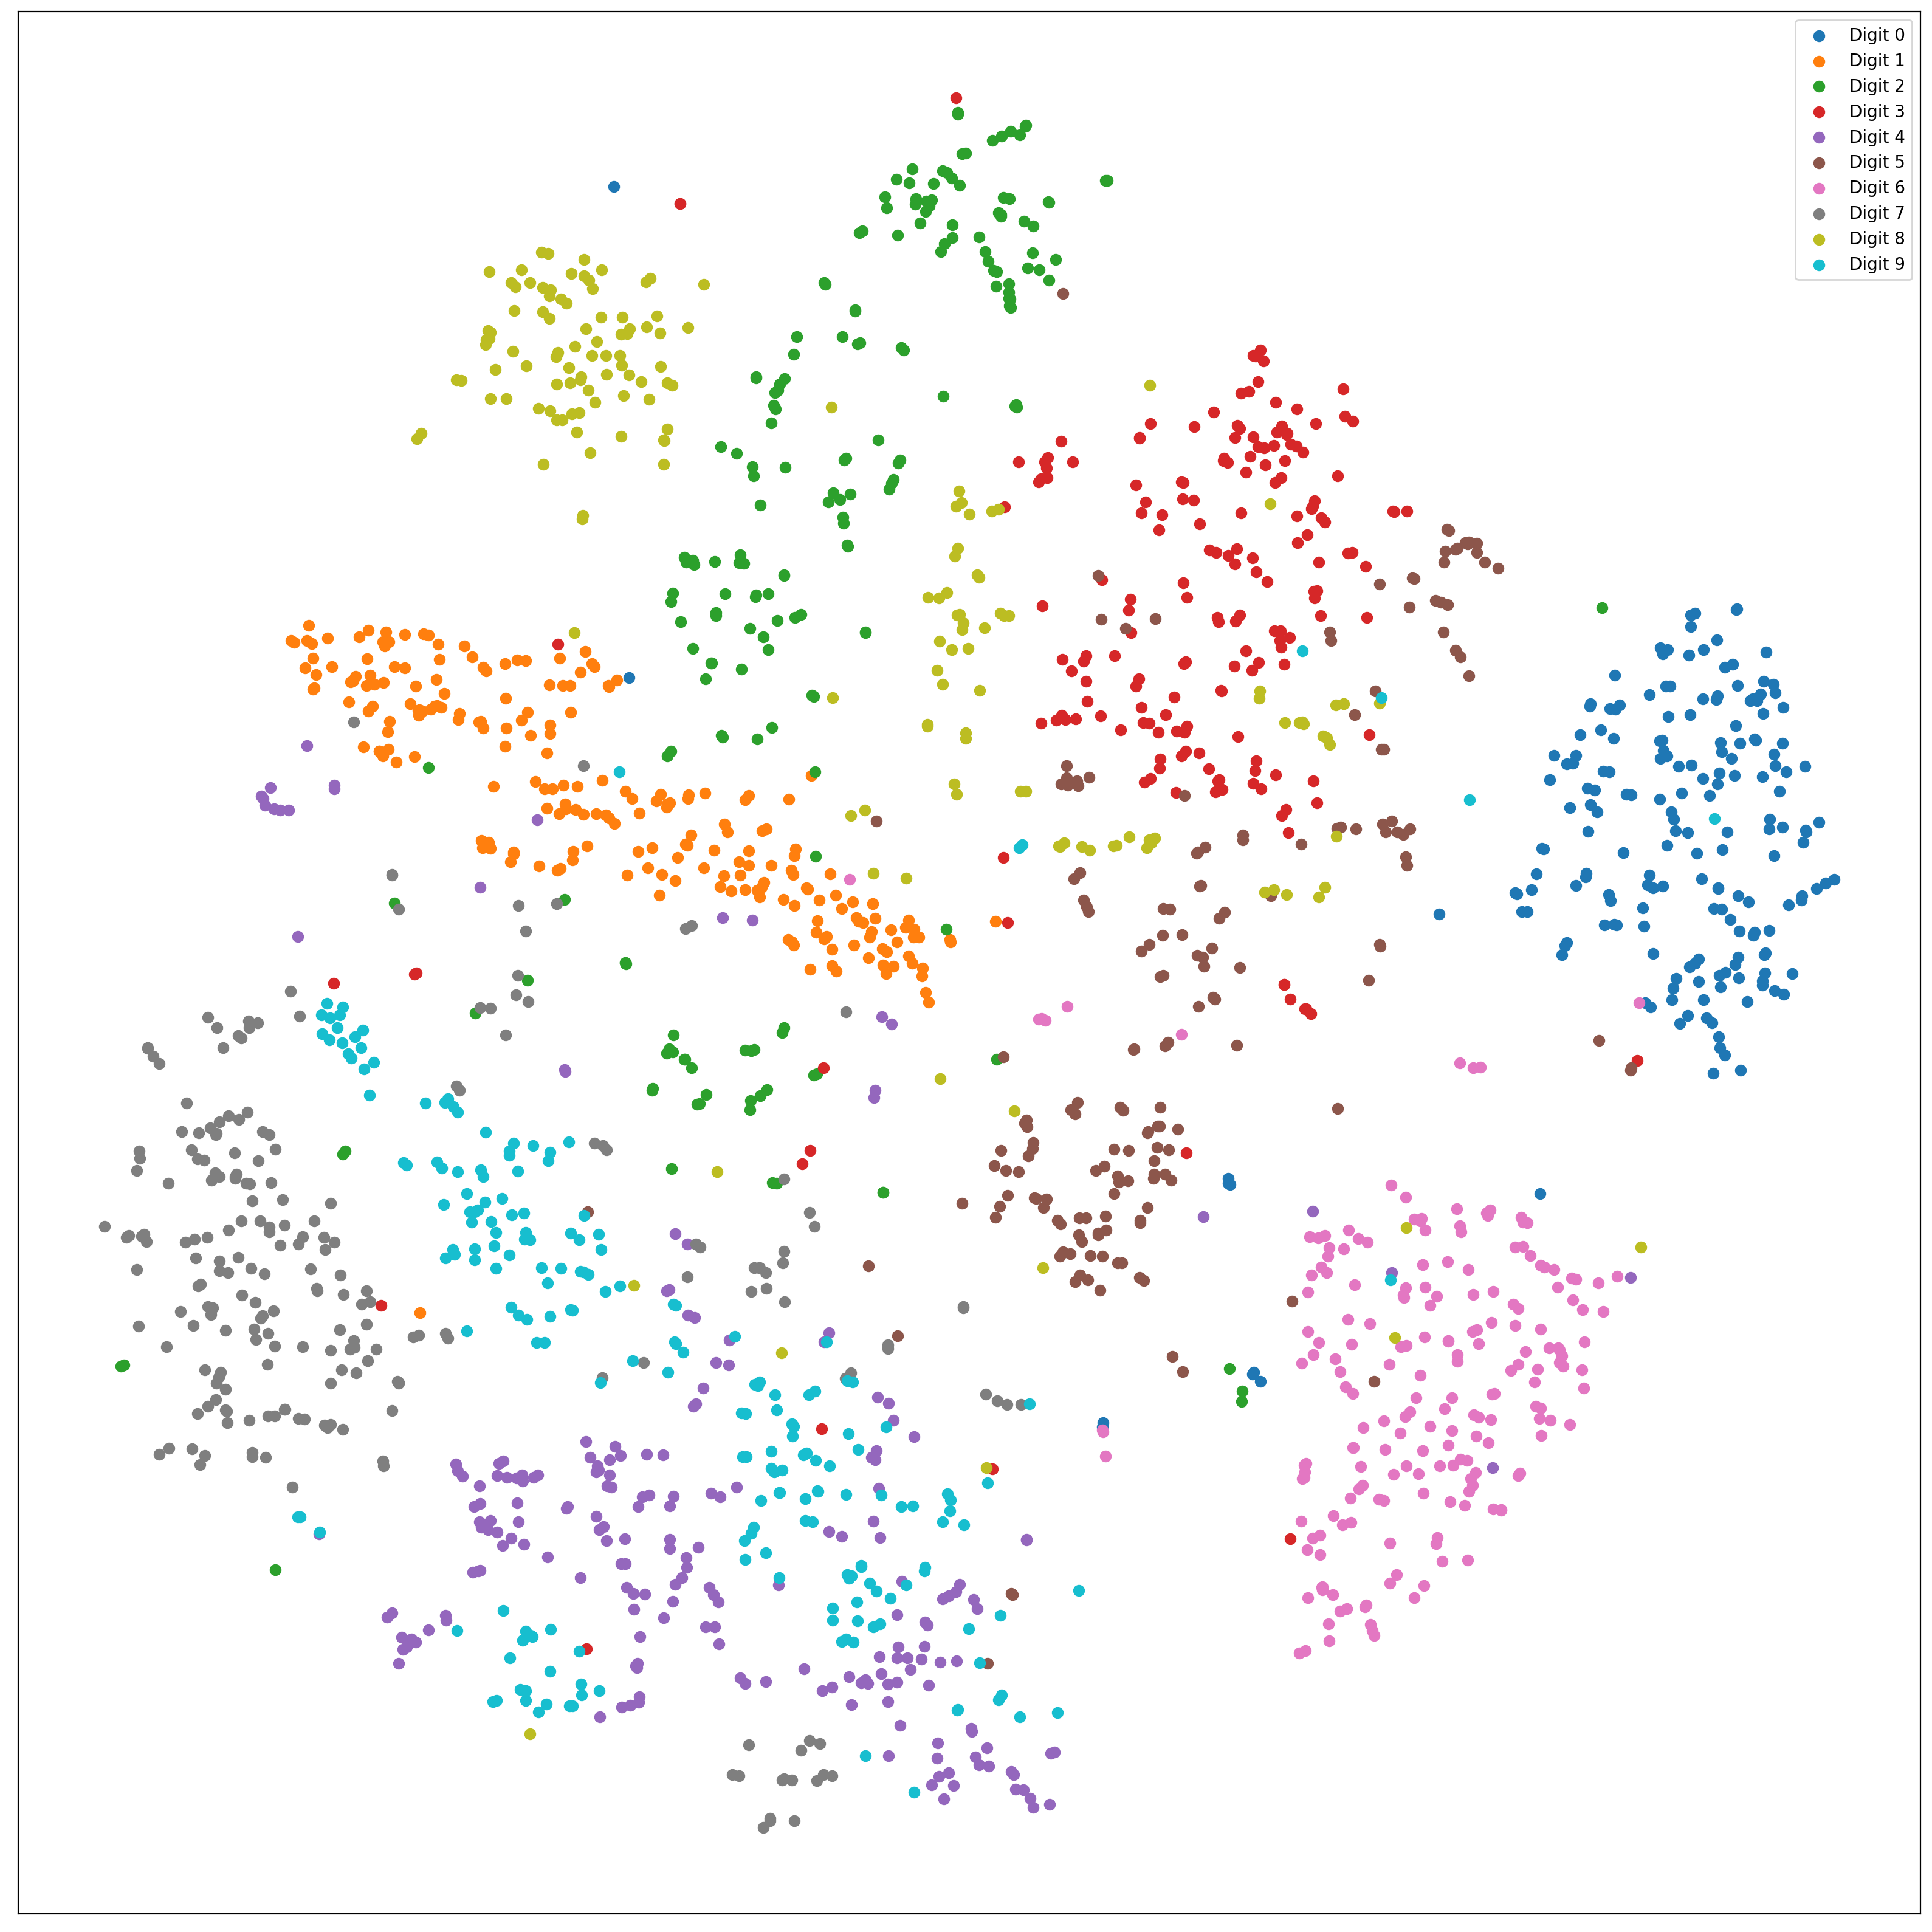

In [16]:
plot_2d_mnist_scatter(X_tsne_embedded, y_small)

### 3D interactive plots with plotly

In [17]:
pip install plotly


Looking in indexes: https://pip-is-disabled.jupyter.lab.ii.agh.edu.pl/
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install --upgrade plotly


Looking in indexes: https://pip-is-disabled.jupyter.lab.ii.agh.edu.pl/
Note: you may need to restart the kernel to use updated packages.


In [19]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


init_notebook_mode(connected=True)

def plot_3d_mnist_plotly_scatter(X, y):
    def make_trace(i):
        digit_indeces = y == i
        return go.Scatter3d(
            x=X[digit_indeces, 0],
            y=X[digit_indeces, 1],
            z=X[digit_indeces, 2],
            mode='markers',
            name=str(i),
            marker=dict(
                color=i,
                colorscale='Jet',
                size=4,
                symbol='circle',
                line=dict(
                    color='rgb(204, 204, 204)',
                    width=1
                )
            )
        )
        
    traces = [make_trace(i) for i in range(10)]
    
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)

Use PCA function to embed `X_small` in **three** dimensions. Store the result in `X_3d_pca_embedded`.

In [20]:
pca_3d = PCA(n_components=3)
X_3d_pca_embedded = pca_3d.fit_transform(X_small, y_small)

In [21]:
X_3d_pca_embedded.shape

(2000, 3)

In [22]:
plot_3d_mnist_plotly_scatter(X_3d_pca_embedded, y_small)

## Classification task

In [23]:
from sklearn.model_selection import train_test_split
SAMPLES_LIMIT=10000
X_train, X_test, y_train, y_test = train_test_split(X[:SAMPLES_LIMIT], y[:SAMPLES_LIMIT], test_size=0.2)

In [24]:
from sklearn import svm

classifier = svm.SVC(C=1, gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.001)

In [25]:
from sklearn import metrics

predicted = classifier.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1, gamma=0.001):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       202
           1       0.92      0.98      0.95       215
           2       0.94      0.91      0.92       211
           3       0.92      0.85      0.88       216
           4       0.91      0.93      0.92       202
           5       0.84      0.86      0.85       185
           6       0.91      0.98      0.94       191
           7       0.92      0.91      0.91       206
           8       0.90      0.82      0.86       186
           9       0.88      0.89      0.88       186

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000




Calculate and display the confision matrix for `predicted` and `y_test` (use metrics package).

In [26]:
import sklearn.metrics 

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, predicted)

print("Confusion matrix:\n{}".format(confusion_matrix))

Confusion matrix:
[[195   0   1   1   1   0   1   1   2   0]
 [  0 210   1   0   0   3   0   0   1   0]
 [  2   4 191   0   4   1   5   1   3   0]
 [  0   2   4 184   0  17   1   3   4   1]
 [  0   1   2   0 188   0   1   1   1   8]
 [  2   1   1  10   2 159   5   0   4   1]
 [  1   1   0   0   2   0 187   0   0   0]
 [  0   3   2   0   3   0   1 188   0   9]
 [  2   7   1   4   4   8   4   1 152   3]
 [  3   0   1   2   2   2   0  10   1 165]]
